In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing data
world=pd.read_csv('GlobalTemperatures.csv')
world.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
world.shape

(3192, 9)

In [5]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
# converting to datetime and extracting months and years
def converToDateTime(df):
  df = df.copy()
  df['dt'] = pd.to_datetime(df['dt'])
  df['Month'] = df['dt'].dt.month
  df['Year'] = df['dt'].dt.year
  return df

world1 = converToDateTime(world)
world1 = world1.drop(['dt'], axis=1)

world_df = world1.set_index('Year')
world_df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
Year,,,,,,,,,
1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1
1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2
1750,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3
1750,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4
1750,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5


In [7]:
world_df = world_df[world_df.index >=1850]

In [8]:
world_df.isnull().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
Month                                        0
dtype: int64

In [12]:

world_df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [13]:
# finding the mean temoeratures over the yrs
year_mean_temp=world_df.groupby(world_df.index).mean()

In [14]:
year_mean_temp

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


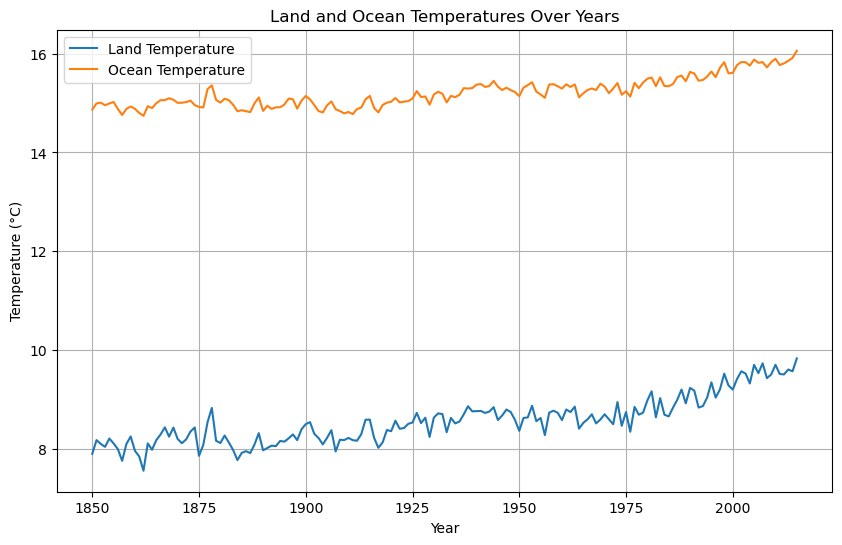

In [17]:
# temoerature over the yrs
plt.figure(figsize=(10, 6))
plt.plot(year_mean_temp.index, year_mean_temp['LandAverageTemperature'], label='Land Temperature')
plt.plot(year_mean_temp.index, year_mean_temp['LandAndOceanAverageTemperature'], label='Ocean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Land and Ocean Temperatures Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# calculating inc over the yrs
year_mean_temp['land_temp_increase'] = year_mean_temp['LandAverageTemperature'].diff()
year_mean_temp['ocean_temp_increase'] = year_mean_temp['LandAndOceanAverageTemperature'].diff()

# Drop the first year since it will have NaN for the increase
year_mean_temp.dropna(inplace=True)

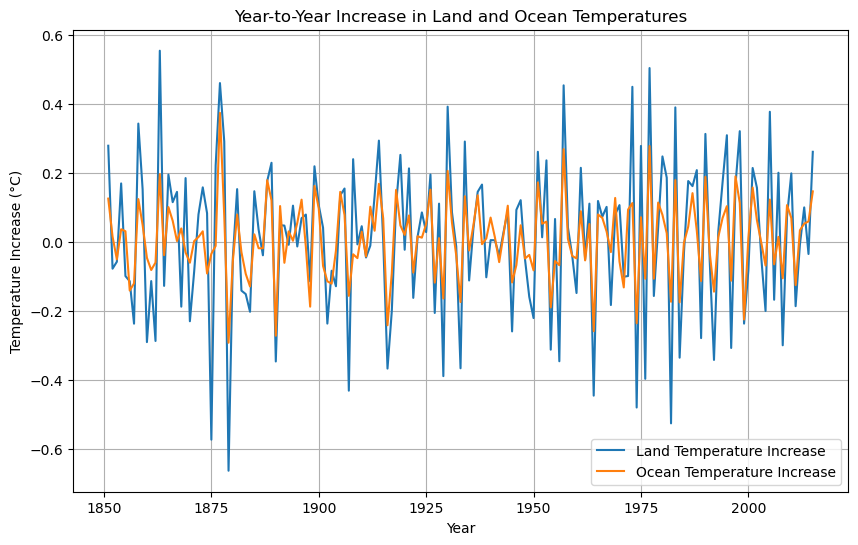

In [19]:
# Plotting the temperature increases
plt.figure(figsize=(10, 6))
plt.plot(year_mean_temp.index,year_mean_temp['land_temp_increase'], label='Land Temperature Increase')
plt.plot(year_mean_temp.index, year_mean_temp['ocean_temp_increase'], label='Ocean Temperature Increase')
plt.xlabel('Year')
plt.ylabel('Temperature Increase (°C)')
plt.title('Year-to-Year Increase in Land and Ocean Temperatures')
plt.legend()
plt.grid(True)
plt.show()

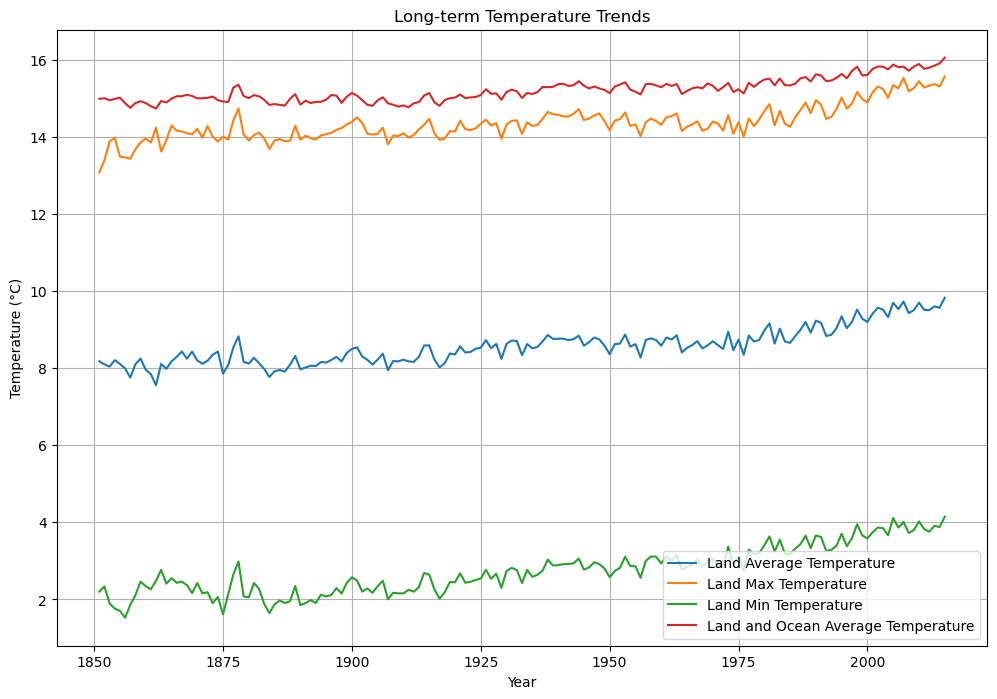

In [20]:
# long term trends
plt.figure(figsize=(12, 8))
plt.plot(year_mean_temp.index, year_mean_temp['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(year_mean_temp.index,year_mean_temp['LandMaxTemperature'], label='Land Max Temperature')
plt.plot(year_mean_temp.index, year_mean_temp['LandMinTemperature'], label='Land Min Temperature')
plt.plot(year_mean_temp.index, year_mean_temp['LandAndOceanAverageTemperature'], label='Land and Ocean Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Long-term Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()

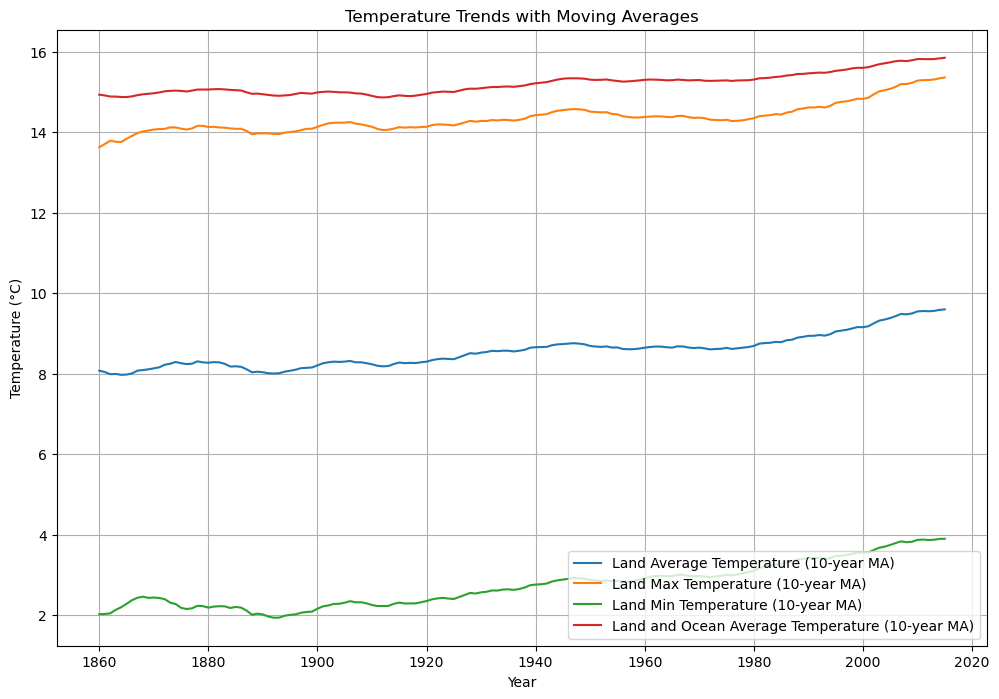

In [21]:
# Calculate moving averages
year_mean_temp['LandAverageTemperature_MA'] = year_mean_temp['LandAverageTemperature'].rolling(window=10).mean()
year_mean_temp['LandMaxTemperature_MA'] = year_mean_temp['LandMaxTemperature'].rolling(window=10).mean()
year_mean_temp['LandMinTemperature_MA'] = year_mean_temp['LandMinTemperature'].rolling(window=10).mean()
year_mean_temp['LandAndOceanAverageTemperature_MA'] = year_mean_temp['LandAndOceanAverageTemperature'].rolling(window=10).mean()

# Plot moving averages
plt.figure(figsize=(12, 8))
plt.plot(year_mean_temp.index, year_mean_temp['LandAverageTemperature_MA'], label='Land Average Temperature (10-year MA)')
plt.plot(year_mean_temp.index, year_mean_temp['LandMaxTemperature_MA'], label='Land Max Temperature (10-year MA)')
plt.plot(year_mean_temp.index,year_mean_temp['LandMinTemperature_MA'], label='Land Min Temperature (10-year MA)')
plt.plot(year_mean_temp.index,year_mean_temp['LandAndOceanAverageTemperature_MA'], label='Land and Ocean Average Temperature (10-year MA)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

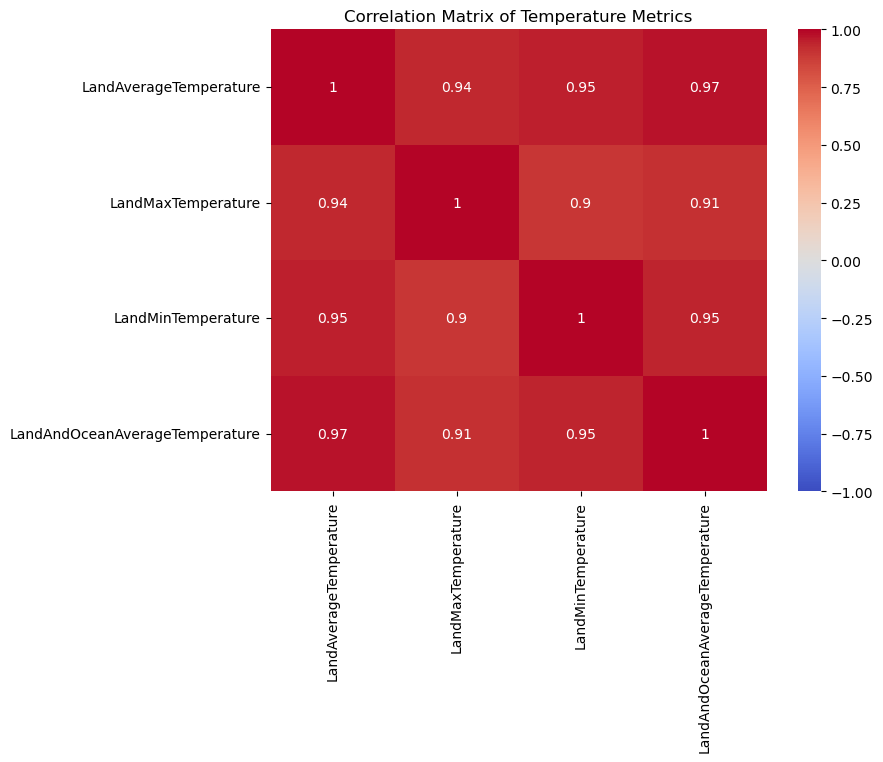

In [23]:
# Calculate correlation matrix
correlation_matrix = year_mean_temp[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']].corr()
import seaborn as sns
# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Temperature Metrics')
plt.show()

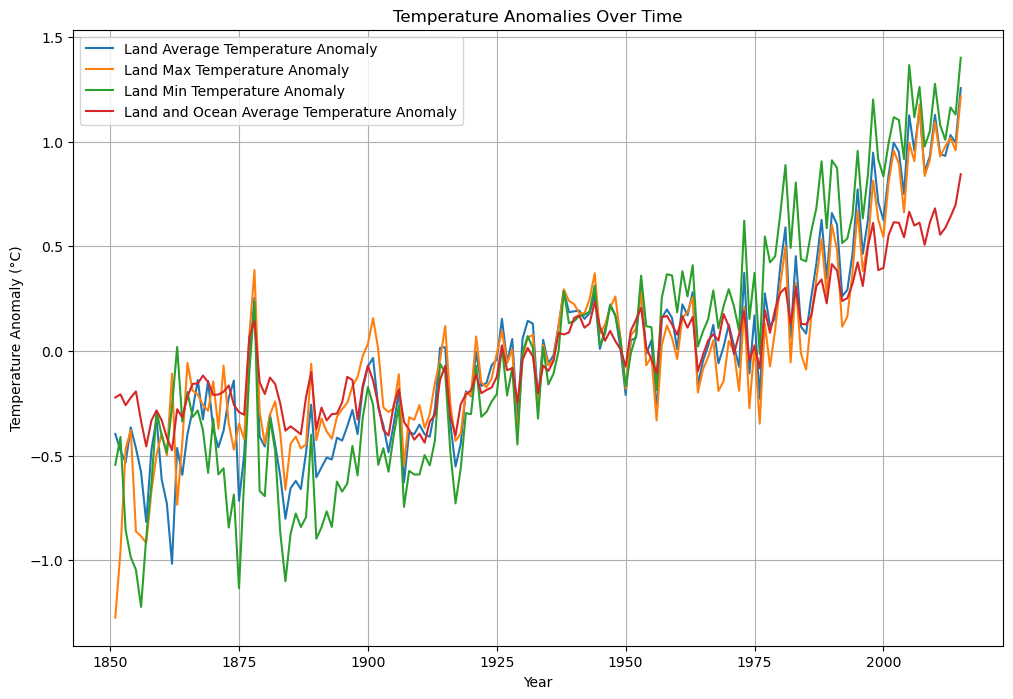

In [24]:
# Calculate anomalies as deviations from the mean
year_mean_temp['LandAverageTemperature_Anomaly'] = year_mean_temp['LandAverageTemperature'] - year_mean_temp['LandAverageTemperature'].mean()
year_mean_temp['LandMaxTemperature_Anomaly'] = year_mean_temp['LandMaxTemperature'] - year_mean_temp['LandMaxTemperature'].mean()
year_mean_temp['LandMinTemperature_Anomaly'] = year_mean_temp['LandMinTemperature'] - year_mean_temp['LandMinTemperature'].mean()
year_mean_temp['LandAndOceanAverageTemperature_Anomaly'] = year_mean_temp['LandAndOceanAverageTemperature'] - year_mean_temp['LandAndOceanAverageTemperature'].mean()

# Plot anomalies
plt.figure(figsize=(12, 8))
plt.plot(year_mean_temp.index, year_mean_temp['LandAverageTemperature_Anomaly'], label='Land Average Temperature Anomaly')
plt.plot(year_mean_temp.index, year_mean_temp['LandMaxTemperature_Anomaly'], label='Land Max Temperature Anomaly')
plt.plot(year_mean_temp.index, year_mean_temp['LandMinTemperature_Anomaly'], label='Land Min Temperature Anomaly')
plt.plot(year_mean_temp.index, year_mean_temp['LandAndOceanAverageTemperature_Anomaly'], label='Land and Ocean Average Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Anomalies Over Time')
plt.legend()
plt.grid(True)
plt.show()

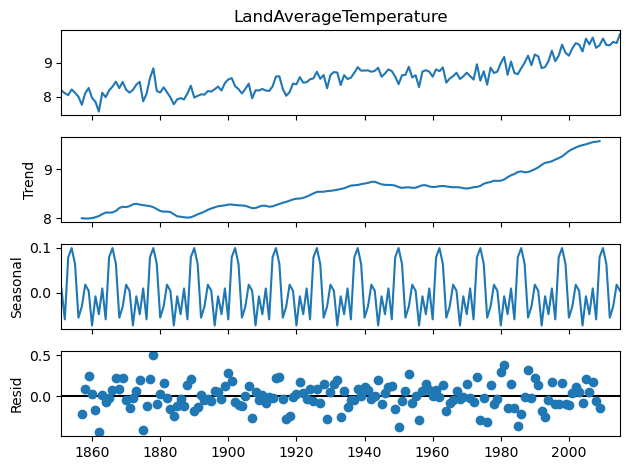

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the temperature data
result = seasonal_decompose(year_mean_temp['LandAverageTemperature'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()